# Setting up Database
Connecting pyhton and mysql and creating tables in database from csv files

In [1]:
# check pandas, matplotlib and seaborn packages are installed. if not then pip install pandas , matplotlib and seaborn
# check mysql connector installed. if not "  pip install mysql-connector-python

# import pandas as pd
# import mysql.connector
# import os

# # 1. List of CSV files and their corresponding table names
# csv_files = [
#     ('customers.csv', 'customers'),
#     ('geolocation.csv', 'geolocation'),
#     ('order_items.csv', 'order_items'),
#     ('orders.csv', 'orders'),
#     ('payments.csv', 'payments'),
#     ('products.csv', 'products'),
#     ('sellers.csv', 'sellers')
   
# ]

# # 2.Connect to the MySQL database
# conn = mysql.connector.connect(
#     host='localhost',
#     user='root',
#     password='my_sql12',
#     database='Target_ecommerce'
# )
# cursor = conn.cursor()

# # 3.Folder containing the CSV files
# folder_path = '/Users/amitdevkatte/SQL/SQL Projects/TargetEcommerceDataset'

# def get_sql_type(dtype):
#     if pd.api.types.is_integer_dtype(dtype):
#         return 'INT'
#     elif pd.api.types.is_float_dtype(dtype):
#         return 'FLOAT'
#     elif pd.api.types.is_bool_dtype(dtype):
#         return 'BOOLEAN'
#     elif pd.api.types.is_datetime64_any_dtype(dtype):
#         return 'DATETIME'
#     else:
#         return 'TEXT'

# for csv_file, table_name in csv_files:
#     file_path = os.path.join(folder_path, csv_file)
    
#     # Read the CSV file into a pandas DataFrame
#     df = pd.read_csv(file_path)
    
#     # Replace NaN with None to handle SQL NULL
#     df = df.where(pd.notnull(df), None)
    
#     # Debugging: Check for NaN values
#     print(f"Processing {csv_file}")
#     print(f"NaN values before replacement:\n{df.isnull().sum()}\n")

#     # Clean column names
#     df.columns = [col.replace(' ', '_').replace('-', '_').replace('.', '_') for col in df.columns]

#     # Generate the CREATE TABLE statement with appropriate data types
#     columns = ', '.join([f'`{col}` {get_sql_type(df[col].dtype)}' for col in df.columns])
#     create_table_query = f'CREATE TABLE IF NOT EXISTS `{table_name}` ({columns})'
#     cursor.execute(create_table_query)

#     # Insert DataFrame data into the MySQL table
#     for _, row in df.iterrows():
#         # Convert row to tuple and handle NaN/None explicitly
#         values = tuple(None if pd.isna(x) else x for x in row)
#         sql = f"INSERT INTO `{table_name}` ({', '.join(['`' + col + '`' for col in df.columns])}) VALUES ({', '.join(['%s'] * len(row))})"
#         cursor.execute(sql, values)

#     # Commit the transaction for the current CSV file
#     conn.commit()ff

# # Close the connection
# conn.close()


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector


db = mysql.connector.connect(host ="localhost",
                  username ="root",
                  password ="my_sql12",
                  database = "Target_ecommerce")

cur = db.cursor()

# Questions

Basic Queries
1. List all unique cities where customers are located.
2. Count the number of orders placed in 2017.
3. Find the total sales per category.
4. Calculate the percentage of orders that were paid in installments.
5. Count the number of customers from each state. 

Intermediate Queries
1. Calculate the number of orders per month in 2018.
2. Find the average number of products per order, grouped by customer city.
3. Calculate the percentage of total revenue contributed by each product category.
4. Identify the correlation between product price and the number of times a product has been purchased.
5. Calculate the total revenue generated by each seller, and rank them by revenue.

Advanced Queries
1. Calculate the moving average of order values for each customer over their order history.
2. Calculate the cumulative sales per month for each year.
3. Calculate the year-over-year growth rate of total sales.
4. Calculate the retention rate of customers, defined as the percentage of customers who make another purchase within 6 months of their first purchase.
5. Identify the top 3 customers who spent the most money in each year.



## 1. List all unique cities where customers are located.

In [5]:
query = """ SELECT DISTINCT customer_city FROM customers"""
cur.execute(query)
data = cur.fetchall()
data

[('franca',),
 ('sao bernardo do campo',),
 ('sao paulo',),
 ('mogi das cruzes',),
 ('campinas',),
 ('jaragua do sul',),
 ('timoteo',),
 ('curitiba',),
 ('belo horizonte',),
 ('montes claros',),
 ('rio de janeiro',),
 ('lencois paulista',),
 ('caxias do sul',),
 ('piracicaba',),
 ('guarulhos',),
 ('pacaja',),
 ('florianopolis',),
 ('aparecida de goiania',),
 ('santo andre',),
 ('goiania',),
 ('cachoeiro de itapemirim',),
 ('sao jose dos campos',),
 ('sao roque',),
 ('camacari',),
 ('resende',),
 ('sumare',),
 ('novo hamburgo',),
 ('sao luis',),
 ('sao jose',),
 ('santa barbara',),
 ('ribeirao preto',),
 ('ituiutaba',),
 ('taquarituba',),
 ('sao jose dos pinhais',),
 ('barrinha',),
 ('parati',),
 ('dourados',),
 ('trindade',),
 ('cascavel',),
 ('fortaleza',),
 ('brasilia',),
 ('pelotas',),
 ('porto alegre',),
 ('salto',),
 ('jundiai',),
 ('cacapava',),
 ('sao vicente',),
 ('uberlandia',),
 ('botelhos',),
 ('sao goncalo',),
 ('araucaria',),
 ('nova iguacu',),
 ('areia branca',),
 ('campo

## 2. Count the number of orders placed in 2017.

In [6]:
query = """ SELECT COUNT(order_id) FROM orders WHERE YEAR(order_purchase_timestamp) = 2017"""
cur.execute(query)
data = cur.fetchall()
print(f" Total orders placed in 2017 are : {data[0][0]}")

 Total orders placed in 2017 are : 45101


## 3. Find the total sales per category.

In [7]:
query = """ SELECT p.product_category, ROUND(SUM(py.payment_value),2) AS sales FROM products as p 
JOIN order_items as ot ON p.product_id = ot.product_id
JOIN payments as py ON ot.order_id = py.order_id
GROUP BY  p.product_category
"""
cur.execute(query)
data=cur.fetchall()
df = pd.DataFrame(data, columns = ['Product_category','Sales'])
df

,Product_category,Sales
0,perfumery,506738.66
1,Furniture Decoration,1430176.39
2,telephony,486882.05
3,bed table bath,1712553.67
4,automotive,852294.33
...,...,...
69,cds music dvds,1199.43
70,La Cuisine,2913.53
71,Fashion Children's Clothing,785.67
72,PC Gamer,2174.43


## 4. Calculate the percentage of orders that were paid in installments.

In [8]:
query = """ SELECT (SUM(CASE WHEN payment_installments>=1 THEN 1 else 0 end)/ COUNT(*))*100

FROM payments"""
cur.execute(query)
data = cur.fetchall()
print(f"{data[0][0]} % of orders are paid in installments")

99.9981 % of orders are paid in installments


## 5. Count the number of customers from each state. 

In [9]:
query = """SELECT customer_state, COUNT(customer_state) As Number_of_customers from customers
group by customer_state order by Number_of_customers DESC
"""
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns= ['State','Number_of_customers'])
df.head()

,State,Number_of_customers
0,SP,83492
1,RJ,25704
2,MG,23270
3,RS,10932
4,PR,10090


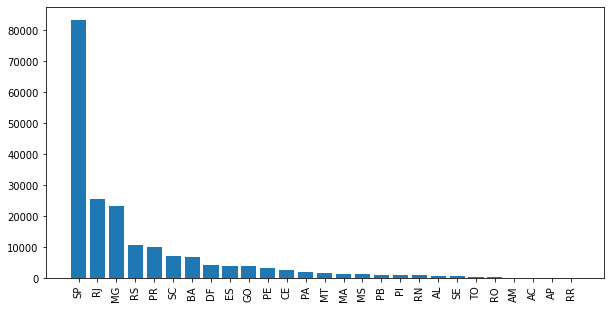

In [10]:

plt.figure(figsize = (10,5))
plt.xticks(rotation =90)
plt.bar(df['State'], df['Number_of_customers'])
plt.show()

## 6. Calculate the number of orders per month in 2018.

In [11]:
query = """ SELECT MONTHNAME(order_purchase_timestamp) AS MONTH , COUNT(order_id) AS ORDER_COUNT from orders
WHERE year(order_purchase_timestamp) = 2018
GROUP BY monthname(order_purchase_timestamp)
ORDER BY MONTH """

cur.execute(query)
data = cur.fetchall()
OM=['January',
 'February',
 'March',
 'April',
 'May',
 'June',
 'July',
 'August',
 'September',
 'October',
 'November',
 'December']
df= pd.DataFrame(data, columns = ['Month', 'Order_Counts'])
df

,Month,Order_Counts
0,April,6939
1,August,6512
2,February,6728
3,January,7269
4,July,6292
5,June,6167
6,March,7211
7,May,6873
8,October,4
9,September,16


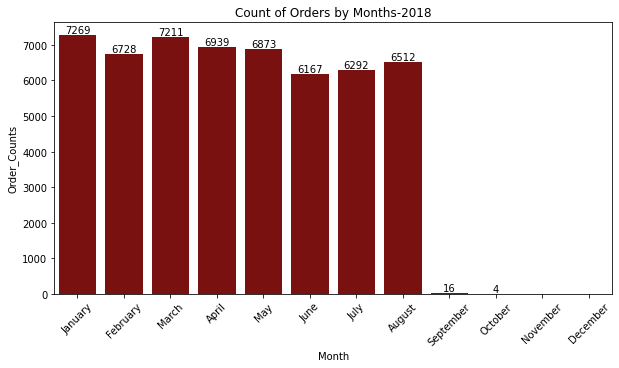

In [12]:
plt.figure(figsize =(10,5))
plt.xticks(rotation =45)
ax = sns.barplot(x=df['Month'], y =df['Order_Counts'],data= df ,order = OM, color = 'darkred')
ax.bar_label(ax.containers[0], fontsize=10 )
plt.title('Count of Orders by Months-2018')
plt.show()

## 7. Find the average number of products per order, grouped by customer city.

In [13]:
  query = """ WITH CTE AS(
        SELECT order_items.order_id,  orders.customer_id, COUNT(order_items.product_id) product_count FROM order_items
        JOIN orders ON orders.order_id = order_items.order_id
        GROUP BY order_items.order_id, orders.customer_id
        )
        SELECT customers.customer_city, ROUND(AVG(cte.product_count),2) As AverageProductsPerOrder  FROM customers
        Join CTE on CTE.customer_id = customers.customer_id
        GROUP BY customers.customer_city 
        ORDER BY AverageProductsPerOrder DESC"""
cur.execute(query)
df =pd.DataFrame(cur.fetchall(), columns =['Customer_city', 'AverageProductsPerOrder'])
df

,Customer_city,AverageProductsPerOrder
0,padre carvalho,7.00
1,celso ramos,6.50
2,datas,6.00
3,candido godoi,6.00
4,matias olimpio,5.00
...,...,...
4105,tuiuti,1.00
4106,tibau do sul,1.00
4107,sao mamede,1.00
4108,sambaiba,1.00


## 8. Calculate the percentage of total revenue contributed by each product category.

In [21]:
query = """ SELECT UPPER(p.product_category) As Product_Category, 
        ROUND(((SUM(py.payment_value)/(SELECT SUM(payment_value) FROM payments))*100),2) AS sales_Percentage
        FROM products as p 
        JOIN order_items as ot ON p.product_id = ot.product_id
        JOIN payments as py ON ot.order_id = py.order_id
        GROUP BY  p.product_category
        ORDER BY sales_Percentage DESC"""

cur.execute(query)
df = pd.DataFrame(cur.fetchall(), columns = ['Product_Category','sales_Percentage'])
df.head()
# plt.pie(df['sales_Percentage'], labels =df['Product_Category'])
# plt.show()

,Product_Category,sales_Percentage
0,BED TABLE BATH,10.70
1,HEALTH BEAUTY,10.35
2,COMPUTER ACCESSORIES,9.90
3,FURNITURE DECORATION,8.93
4,WATCHES PRESENT,8.93


## 9. Identify the correlation between product price and the number of times a product has been purchased.

In [26]:
query = """SELECT products.Product_category,
	count(order_items.product_id ) Product_count,
    ROUND(AVG(Price),2) as Avg_Price from order_items
JOIN products ON order_items.product_id = products.product_id
GROUP BY Product_category"""

cur.execute(query)
df = pd.DataFrame(cur.fetchall(), columns = ['Category','Price','Product_Count'])
arr1 = df['Price']
arr2 = df['Product_Count']
np.corrcoef(arr1,arr2)

array([[ 1.        , -0.10631514],
       [-0.10631514,  1.        ]])

## 10. Calculate the total revenue generated by each seller, and rank them by revenue.

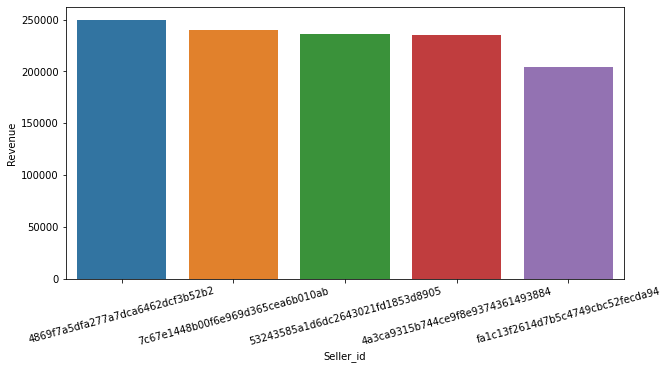

In [49]:
query = """SELECT * ,
        DENSE_RANK() OVER(ORDER BY Revenue DESC)
        FROM
        (SELECT seller_id, ROUND(sum(Price + freight_value),2) as Revenue from order_items
        group by seller_id ) As a """
cur.execute(query)
df= pd.DataFrame(cur.fetchall(), columns =['Seller_id','Revenue','Rank'])
df=df.head()
plt.figure(figsize = (10,5))
sns.barplot(x= 'Seller_id', y ='Revenue', data =df)
plt.xticks(rotation =15)
plt.show()

## 11. Calculate the moving average of order values for each customer over their order history.

In [51]:
query = """SELECT customer_id, order_purchase_timestamp,payment,
        ROUND(AVG(payment) over( PARTITION BY customer_id ORDER BY customer_id,order_purchase_timestamp
        rows between 2 preceding and current row),2) as Mov_Average
        FROM(
        SELECT orders.customer_id, orders.order_purchase_timestamp, payments.payment_value as payment
        FROM payments JOIN orders ON payments.order_id = orders.order_id) as a;"""
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ['Customer_id','Purchase_time','Payments','Moving_Avg'])
df

,Customer_id,Purchase_time,Payments,Moving_Avg
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.74
1,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,67.41,67.41
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,195.42,195.42
3,0002414f95344307404f0ace7a26f1d5,2017-08-16 13:09:20,179.35,179.35
4,000379cdec625522490c315e70c7a9fb,2018-04-02 13:42:17,107.01,107.01
...,...,...,...,...
103881,fffecc9f79fd8c764f843e9951b11341,2018-03-29 16:59:26,9.49,27.12
103882,fffeda5b6d849fbd39689bb92087f431,2018-05-22 13:36:02,63.13,63.13
103883,ffff42319e9b2d713724ae527742af25,2018-06-13 16:57:05,214.13,214.13
103884,ffffa3172527f765de70084a7e53aae8,2017-09-02 11:53:32,45.50,45.50


## 12. Calculate the cumulative sales per month for each year.

In [58]:
query = """SELECT years, months,
            ROUND(SUM(payment) OVER (PARTITION BY years order by dates),2) as Cum_sale_per_Month
            from 
            (SELECT MAX(orders.order_purchase_timestamp) as dates ,
            Year(orders.order_purchase_timestamp) as years, 
            monthname(orders.order_purchase_timestamp) as Months , 
            ROUND(sum(payments.payment_value),2) as payment
            FROM orders JOIN payments on orders.order_id = payments.order_id
            group by years, Months
           ) As a;"""
# "MAX(orders.order_purchase_timestamp) as dates" this code is used to sort 
#  by monthnames Chronological instead of alphabetically.
cur.execute(query)
df = pd.DataFrame(cur.fetchall(), columns =['Year', 'Month', 'Cum_sale_per_month'])
df

,Year,Month,Cum_sale_per_month
0,2016,September,252.24
1,2016,October,59342.72
2,2016,December,59362.34
3,2017,January,138488.04
4,2017,February,430396.05
5,2017,March,880259.65
6,2017,April,1298047.68
7,2017,May,1890966.50
8,2017,June,2402242.88
9,2017,July,2994625.80


In [ ]:
# Visualization : use stacked bar chart

## 13. Calculate the year-over-year growth rate of total sales.

In [99]:
query = """SELECT *,
            ROUND(((payment -lag(payment,1) OVER(order by years)) /lag(payment,1) OVER(order by years))*100,2) As YoY_Growth
            FROM
            (SELECT Year(orders.order_purchase_timestamp) as years, 
            ROUND(sum(payments.payment_value),2) as payment
            FROM orders JOIN payments on orders.order_id = payments.order_id
            group by years) as a ;"""
cur.execute(query)
df  =pd.DataFrame(cur.fetchall(), columns =['Year','Sales','YoY%Growth'])
df

,Year,Sales,YoY%Growth
0,2016,59362.34,NaN
1,2017,7249746.73,12112.7
2,2018,8699763.05,20.0


## 14. Calculate the retention rate of customers, defined as the percentage of customers who make another purchase within 6 months of their first purchase.

In [109]:
query = """ WITH CTE  AS (SELECT customers.customer_unique_id ,orders.order_purchase_timestamp AS First_purchase,
            sum(payments.payment_value) Purchase_Value,
            LEAD(orders.order_purchase_timestamp,1) OVER (PARTITION BY customers.customer_unique_id order by orders.order_purchase_timestamp) as next_purchase
            FROM customers
            JOIN orders ON customers.customer_id = orders.customer_id
            JOIN payments ON orders.order_id = payments.order_id
            GROUP BY customers.customer_unique_id,orders.order_purchase_timestamp
            ORDER BY customers.customer_unique_id)

            SELECT  100*COUNT(DISTINCT customer_unique_id ) /(SELECT COUNT(DISTINCT customer_unique_id ) FROM customers)FROM CTE
            WHERE (CTE.next_purchase IS NOT NULL)
                    AND ((First_purchase- next_Purchase)<=6)"""
cur.execute(query)
df= pd.DataFrame(cur.fetchall())

print("The retention rate percentage of customers is: ", df[0][0])

The retention rate percentage of customers is:  2.8513


## 15. Identify the top 3 customers who spent the most money in each year.

In [4]:
query = """WITH CTE AS(
        SELECT  Year(orders.order_purchase_timestamp) years ,
        customers.customer_unique_id as customer, 
        ROUND(sum(payments.payment_value),0) spent,
        DENSE_RANK() OVER(PARTITION BY Year(orders.order_purchase_timestamp) 
        ORDER BY sum(payments.payment_value) DESC) as rnk
        FROM customers 
        JOIN orders ON customers.customer_id = orders.customer_id
        JOIN payments ON payments.order_id = orders.order_id 
        GROUP BY years, customer
        order by years, Spent DESC
        )
        SELECT * FROm CTE WHERE rnk<4"""
cur.execute(query)
df = pd.DataFrame(cur.fetchall(),columns = ['Year','Customer','Yearly_spent','Top_customer'])
df

,Year,Customer,Yearly_spent,Top_customer
0,2016,fdaa290acb9eeacb66fa7f979baa6803,2847.0,1
1,2016,753bc5d6efa9e49a03e34cf521a9e124,2801.0,2
2,2016,b92a2e5e8a6eabcc80882c7d68b2c70b,2456.0,3
3,2017,0a0a92112bd4c708ca5fde585afaa872,27328.0,1
4,2017,da122df9eeddfedc1dc1f5349a1a690c,15143.0,2
5,2017,dc4802a71eae9be1dd28f5d788ceb526,13859.0,3
6,2018,46450c74a0d8c5ca9395da1daac6c120,19106.0,1
7,2018,763c8b1c9c68a0229c42c9fc6f662b93,14550.0,2
8,2018,459bef486812aa25204be022145caa62,13844.0,3


In [19]:
# Visualization bar plot